# Analysis of Gender Gap in STEM Graduates

### At first, we can import our libraries, mount our drive and select our path

In [23]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [24]:
df = pd.read_csv('stem_data.csv')

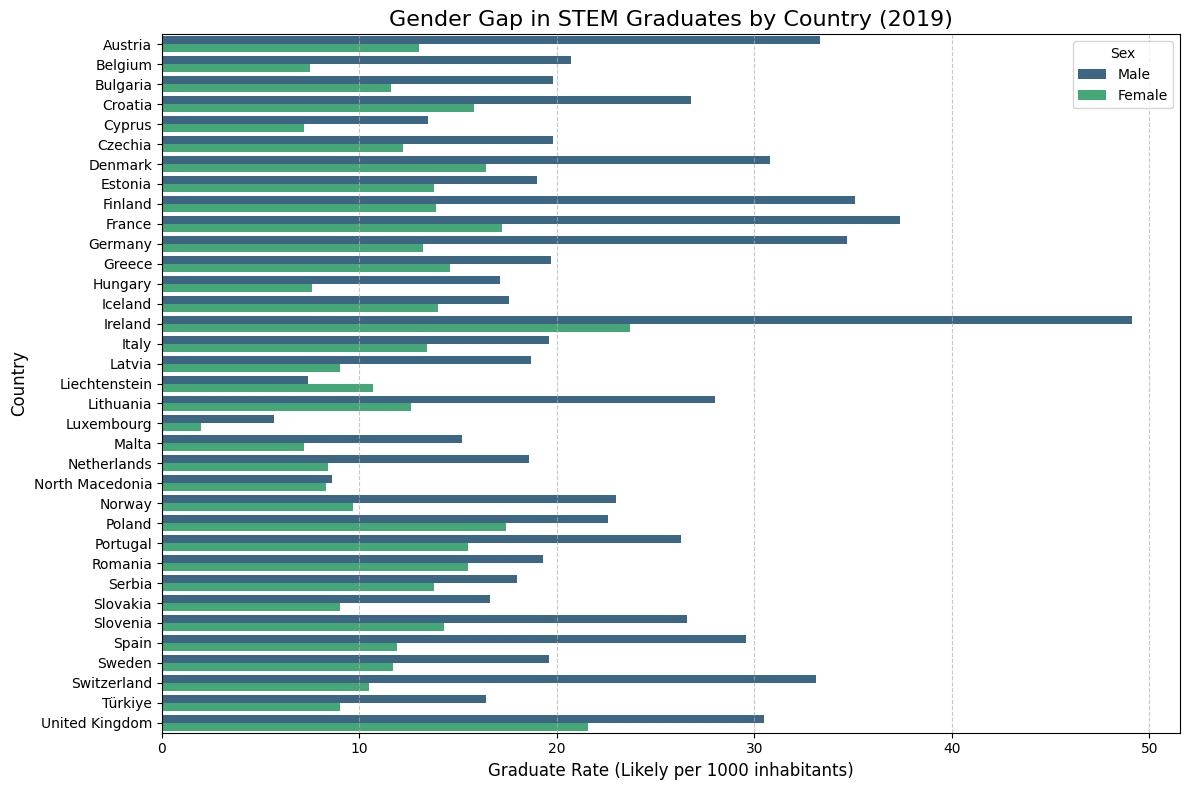

In [25]:
# 2. Data Cleaning
# Drop rows where 'VALUE' is empty/NaN (like Albania in your image)
df_clean = df.dropna(subset=['VALUE'])

# Convert VALUE to numeric just in case Python read it as text
df_clean['VALUE'] = pd.to_numeric(df_clean['VALUE'])

# 3. Prepare data for analysis
# Focus on the most recent year (2019) to see the current situation
# Filter to exclude "Total Persons"; we want to compare Male vs Female
df_2019 = df_clean[ (df_clean['Year'] == 2019) & (df_clean['Sex'] != 'Total Persons') ]

# Optional: Remove aggregates like "EU 27 Countries" to see individual countries
df_2019 = df_2019[~df_2019['Countries'].str.contains("EU 27")]

# 4. Visualization: Grouped Bar Chart
plt.figure(figsize=(12, 8)) # Make the chart large

# Use Seaborn to plot
# x = Value, y = Country, hue = Sex (this creates the different colored bars)
sns.barplot(
    data=df_2019,
    x='VALUE',
    y='Countries',
    hue='Sex',
    palette='viridis' # A professional color scheme
)

plt.title('Gender Gap in STEM Graduates by Country (2019)', fontsize=16)
plt.xlabel('Graduate Rate (Likely per 1000 inhabitants)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Sex')
plt.grid(axis='x', linestyle='--', alpha=0.7) # Soft grid for readability

plt.tight_layout()
plt.show()

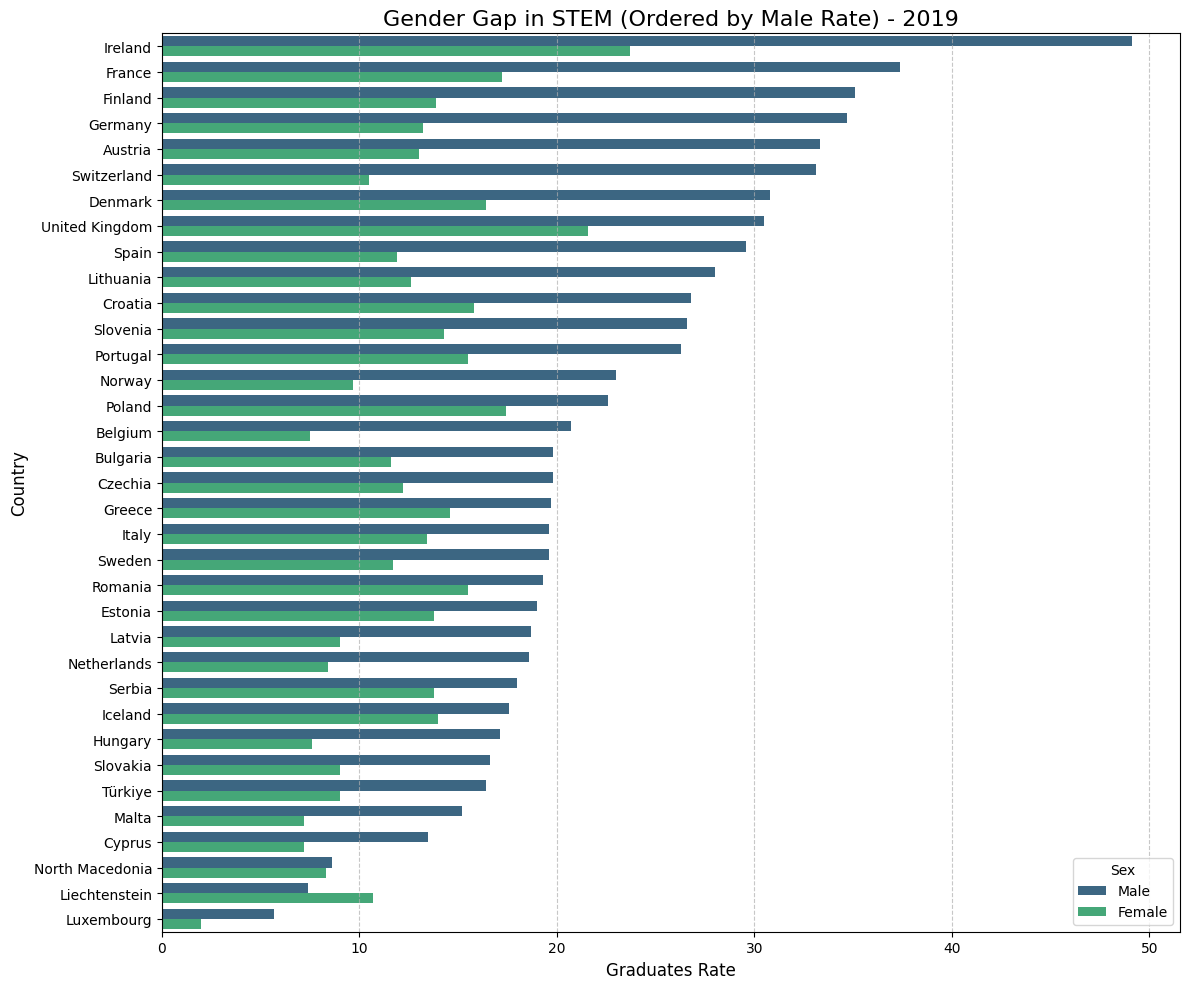

In [26]:
# --- CHART 1: Gender Gap Ordered by Male Performance ---

# 1. Define the sorting order
# We filter only males, sort by Value descending, and get the list of Country names
male_data = df_2019[df_2019['Sex'] == 'Male']
sorted_countries = male_data.sort_values('VALUE', ascending=False)['Countries']

# 2. Plotting
plt.figure(figsize=(12, 10)) # A bit taller to fit all countries comfortably

sns.barplot(
    data=df_2019,
    x='VALUE',
    y='Countries',
    hue='Sex',
    palette='viridis',
    order=sorted_countries # <--- This is the magic line that applies the order
)

plt.title('Gender Gap in STEM (Ordered by Male Rate) - 2019', fontsize=16)
plt.xlabel('Graduates Rate', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Sex')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

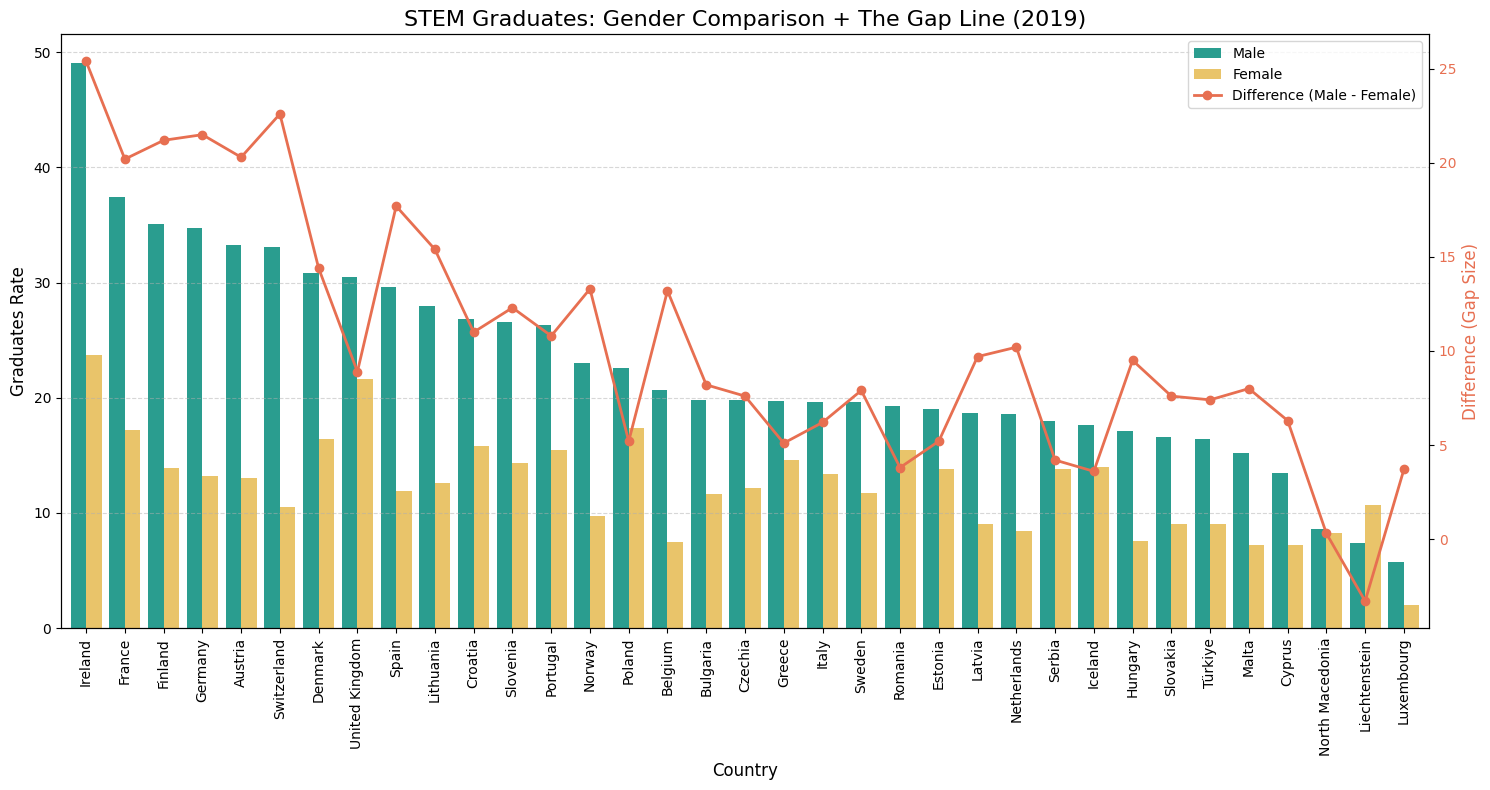

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the Data: Pivot to get Male and Female in separate columns
# We take the filtered 2019 data
df_pivot = df_2019.pivot(index='Countries', columns='Sex', values='VALUE')

# 2. Calculate the Difference (The Gap)
df_pivot['Difference'] = df_pivot['Male'] - df_pivot['Female']

# 3. Sort by Male value (to keep the "inverted" order you liked)
df_pivot = df_pivot.sort_values('Male', ascending=False)

# --- THE PLOT ---
fig, ax1 = plt.subplots(figsize=(15, 8))

# Part A: The Bars (Male & Female) - Plotted on the Left Axis (ax1)
# We use pandas built-in plotting for easy grouped bars
df_pivot[['Male', 'Female']].plot(kind='bar', ax=ax1, width=0.8, color=['#2a9d8f', '#e9c46a'])

ax1.set_ylabel('Graduates Rate', fontsize=12)
ax1.set_title('STEM Graduates: Gender Comparison + The Gap Line (2019)', fontsize=16)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Part B: The Line (Difference) - Plotted on the Right Axis (ax2)
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis
ax2.plot(
    df_pivot.index,
    df_pivot['Difference'],
    color='#e76f51', # A reddish color to highlight the gap
    marker='o',      # Dots on the points
    linewidth=2,
    linestyle='-',
    label='Difference (Male - Female)'
)

ax2.set_ylabel('Difference (Gap Size)', fontsize=12, color='#e76f51')
ax2.tick_params(axis='y', labelcolor='#e76f51') # Color the numbers red too

# Adjust x-axis labels (rotate them)
ax1.set_xticklabels(df_pivot.index, rotation=90)
ax1.set_xlabel('Country', fontsize=12)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

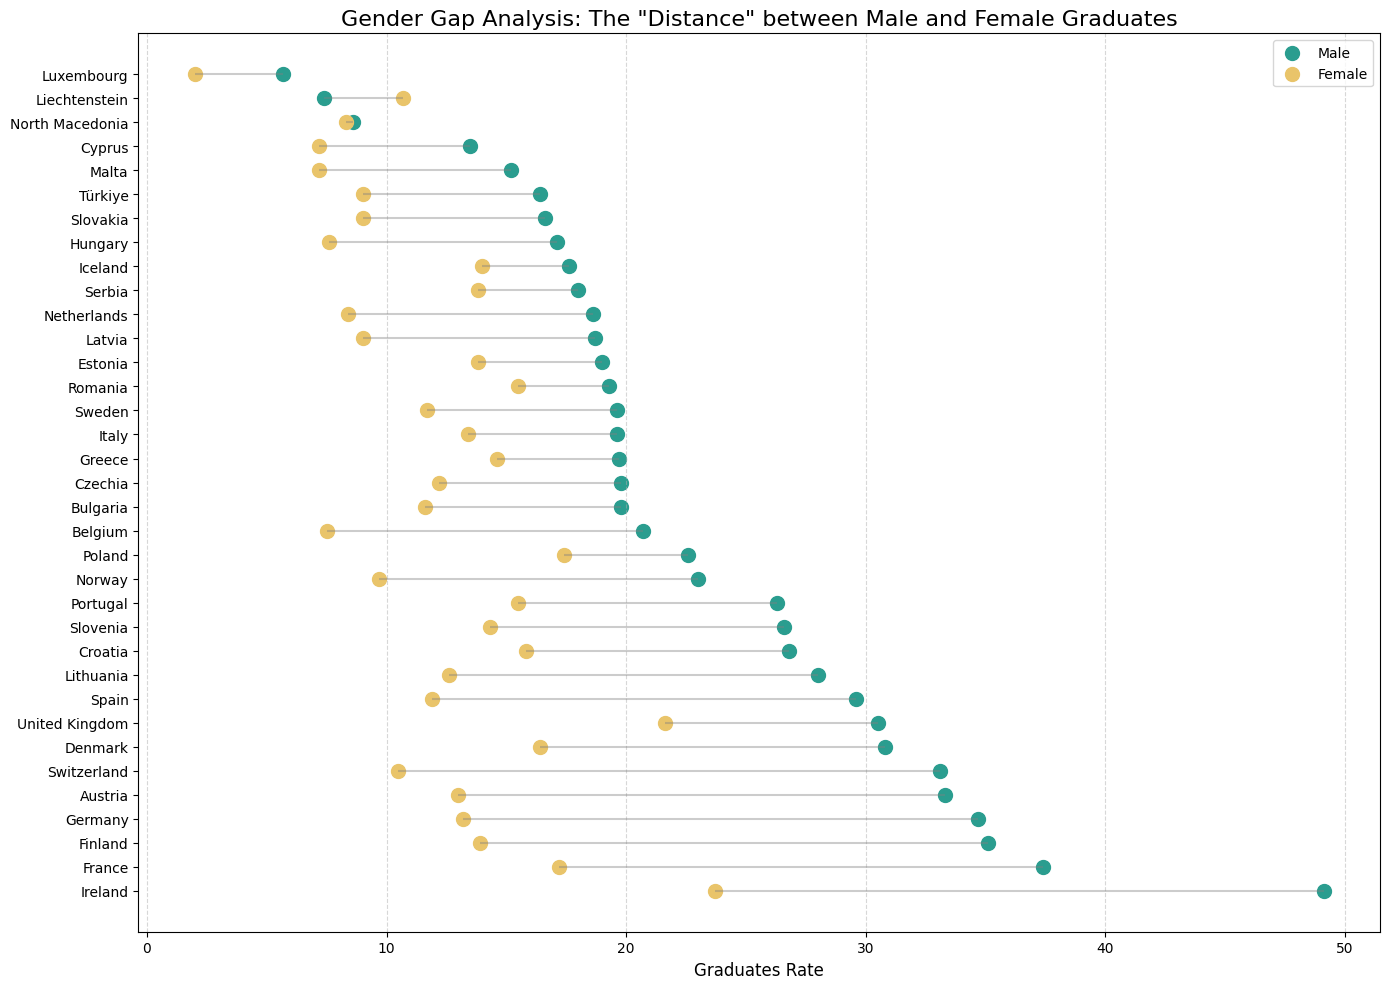

In [29]:
plt.figure(figsize=(14, 10))

# 1. Draw the lines connecting the dots
plt.hlines(y=df_pivot.index, xmin=df_pivot['Female'], xmax=df_pivot['Male'], color='grey', alpha=0.4)

# 2. Draw the dots
plt.scatter(df_pivot['Male'], df_pivot.index, color='#2a9d8f', alpha=1, label='Male', s=100)
plt.scatter(df_pivot['Female'], df_pivot.index, color='#e9c46a', alpha=1, label='Female', s=100)

plt.title('Gender Gap Analysis: The "Distance" between Male and Female Graduates', fontsize=16)
plt.xlabel('Graduates Rate', fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()